In [75]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import cross_val_score
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split

%matplotlib inline

pd.options.display.float_format = '{:20,.2f}'.format
pd.options.display.max_columns = 100
pd.options.display.max_rows = 50

In [76]:
# read in data
with open('data/clean_data1.pk1', 'rb') as picklefile:
    df = pickle.load(picklefile)

# look at data
print df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805 entries, 0 to 1804
Data columns (total 68 columns):
actors             1805 non-null object
budget             1805 non-null float64
director           1805 non-null object
genre              1805 non-null object
gross_domestic     1805 non-null float64
imdb_rating        1805 non-null float64
meta_score         1805 non-null float64
mpaa_rating        1805 non-null object
opening_weekend    1805 non-null float64
release_date       1805 non-null datetime64[ns]
runtime_mins       1805 non-null float64
title              1805 non-null object
writer             1805 non-null object
release_month      1805 non-null object
release_year       1805 non-null int64
inf_budget         1805 non-null float64
inf_gross          1805 non-null float64
inf_opening        1805 non-null float64
G                  1805 non-null int64
PG                 1805 non-null int64
PG-13              1805 non-null int64
R                  1805 non-null int64
U

actors               budget  \
0       [Bruce Willis, Helen Mirren, Morgan Freeman]        58,000,000.00   
1  [Jay Baruchel, Gerard Butler, Christopher Mint...       165,000,000.00   
2           [Adam Sandler, Salma Hayek, Kevin James]        80,000,000.00   
3     [Jesse Eisenberg, Emma Stone, Woody Harrelson]        23,600,000.00   
4    [Edward Asner, Jordan Nagai, John Ratzenberger]       175,000,000.00   

             director                                              genre  \
0  [Robert Schwentke]                    Action, Comedy, Crime, Thriller   
1      [Dean DeBlois]   Animation, Action, Adventure, Comedy, Family,...   
2      [Dennis Dugan]                                     Comedy, Family   
3   [Ruben Fleischer]                  Adventure, Comedy, Horror, Sci-Fi   
4       [Pete Docter]               Animation, Adventure, Comedy, Family   

        gross_domestic          imdb_rating           meta_score mpaa_rating  \
0        90,356,857.00                71.00                60.00       PG-13   
1       217,387,997.00                82.00                74.00          PG   
2       162,001,186.00                60.00                30.00       PG-13   
3        75,590,286.00                77.00                73.00           R   
4       292,979,556.00                83.00                88.00          PG   

       opening_weekend release_date         runtime_mins  \
0        21,761,408.00   2010-10-15               111.00   
1        43,732,319.00   2010-03-26                98.00   
2        40,506,562.00   2010-06-25               102.00   
3        24,733,155.00   2009-10-02                88.00   
4        68,108,790.00   2009-05-29                96.00   

                      title            writer release_month  release_year  \
0                       RED      [Jon Hoeber]       October          2010   
1  How to Train Your Dragon  [William Davies]         March          2010   
2                 Grown Ups    [Adam Sandler]          June          2010   
3                Zombieland     [Rhett Reese]       October          2009   
4                        Up     [Pete Docter]           May          2009   

            inf_budget            inf_gross          inf_opening  G  PG  \
0        63,838,674.47        99,452,792.76        23,952,059.33  0   0   
1       181,610,022.20       239,271,751.27        48,134,711.66  0   1   
2        88,053,344.10       178,309,327.18        44,584,228.02  0   0   
3        26,401,810.41        84,564,423.72        27,669,494.46  0   0   
4       195,776,136.52       327,762,317.44        76,194,718.68  0   1   

   PG-13  R  Unrated  actor_nom director_nom writer_nom  action  adventure  \
0      1  0        0  5 or more      No noms    No noms       1          0   
1      0  0        0    No noms      No noms    No noms       1          1   
2      1  0        0   1-4 noms      No noms    No noms       0          0   
3      0  1        0  5 or more      No noms    No noms       0          1   
4      0  0        0    No noms      No noms   1-4 noms       0          1   

   animation  biography  comedy  crime  documentary  drama  family  fantasy  \
0          0          0       1      1            0      0       0        0   
1          1          0       1      0            0      0       1        1   
2          0          0       1      0            0      0       1        0   
3          0          0       1      0            0      0       0        0   
4          1          0       1      0            0      0       1        0   

   history  horror  music  musical  mystery  romance  sci_fi  sport  thriller  \
0        0       0      0        0        0        0       0      0         1   
1        0       0      0        0        0        0       0      0         0   
2        0       0      0        0        0        0       0      0         0   
3        0       1      0        0        0        0       1      0         0   
4        0       0   

In [77]:
# drop columns not used for model
df_movies = df.drop(['imdb_rating', 'meta_score', 'actors', 'budget', 'director', 'genre','inf_opening', 'gross_domestic', 'opening_weekend', 'release_date', 'mpaa_rating', 'title', 'writer', 'release_year', 'release_month', 'actor_nom', 'director_nom', 'writer_nom'], axis=1)
df_movies.head()

runtime_mins           inf_budget            inf_gross  G  PG  \
0               111.00        63,838,674.47        99,452,792.76  0   0   
1                98.00       181,610,022.20       239,271,751.27  0   1   
2               102.00        88,053,344.10       178,309,327.18  0   0   
3                88.00        26,401,810.41        84,564,423.72  0   0   
4                96.00       195,776,136.52       327,762,317.44  0   1   

   PG-13  R  Unrated  action  adventure  animation  biography  comedy  crime  \
0      1  0        0       1          0          0          0       1      1   
1      0  0        0       1          1          1          0       1      0   
2      1  0        0       0          0          0          0       1      0   
3      0  1        0       0          1          0          0       1      0   
4      0  0        0       0          1          1          0       1      0   

   documentary  drama  family  fantasy  history  horror  music  musical  \
0            0      0       0        0        0       0      0        0   
1            0      0       1        1        0       0      0        0   
2            0      0       1        0        0       0      0        0   
3            0      0       0        0        0       1      0        0   
4            0      0       1        0        0       0      0        0   

   mystery  romance  sci_fi  sport  thriller  war  western  April  August  \
0        0        0       0      0         1    0        0      0       0   
1        0        0       0      0         0    0        0      0       0   
2        0        0       0      0         0    0        0      0       0   
3        0        0       1      0         0    0        0      0       0   
4        0        0       0      0         0    0        0      0       0   

   December  February  January  July  June  March  May  November  October  \
0         0         0        0     0     0      0    0         0        1   
1         0         0        0     0     0      1    0         0        0   
2         0         0        0     0     1      0    0         0        0   
3         0         0        0     0     0      0    0         0        1   
4         0         0        0     0     0      0    1         0        0   

   September  act_1_4  act_5_more  act_0  dir_1_4  dir_5_more  dir_0  wri_1_4  \
0          0        0           1      0        0           0      1        0   
1          0        0           0      1        0           0      1        0   
2          0        1           0      0        0           0      1        0   
3          0        0           1      0        0           0      1        0   
4          0        0           0      1        0           0      1        1   

   wri_5_more  wri_0  
0           0      1  
1           0      1  
2           0      1  
3           0      1  
4           0      0

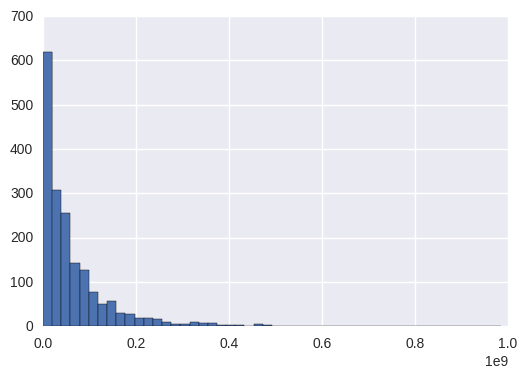

In [78]:
# check out distribution of target variable
plt.hist(df_movies.inf_gross, bins=50);

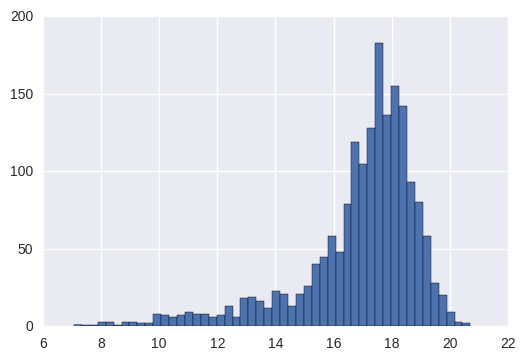

In [79]:
# noramlize the target variable
df_movies['log_inf_gross'] = np.log(df_movies.inf_gross)
plt.hist(df_movies.log_inf_gross, bins=50);

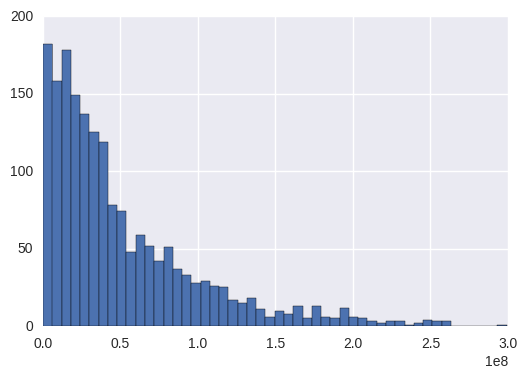

In [80]:
# check out distribution of target variable
plt.hist(df_movies.inf_budget, bins=50);

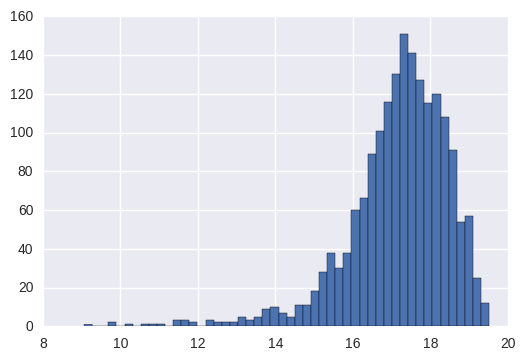

In [81]:
# noramlize budget variable
df_movies['log_inf_budget'] = np.log(df_movies.inf_budget)
plt.hist(df_movies.log_inf_budget, bins=50);

In [82]:
# rearrange the dataframe 
df_movies = df_movies.drop(['inf_gross', 'inf_budget'], axis=1)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805 entries, 0 to 1804
Data columns (total 50 columns):
runtime_mins      1805 non-null float64
G                 1805 non-null int64
PG                1805 non-null int64
PG-13             1805 non-null int64
R                 1805 non-null int64
Unrated           1805 non-null int64
action            1805 non-null int64
adventure         1805 non-null int64
animation         1805 non-null int64
biography         1805 non-null int64
comedy            1805 non-null int64
crime             1805 non-null int64
documentary       1805 non-null int64
drama             1805 non-null int64
family            1805 non-null int64
fantasy           1805 non-null int64
history           1805 non-null int64
horror            1805 non-null int64
music             1805 non-null int64
musical           1805 non-null int64
mystery           1805 non-null int64
romance           1805 non-null int64
sci_fi            1805 non-null int64
sport            

In [83]:
cols = list(df_movies.columns)
new_cols = [cols[-2]] + [cols[-1]] + cols[0:48]
new_cols
df_movies = df_movies[new_cols]
df_movies.head()

log_inf_gross       log_inf_budget         runtime_mins  G  PG  \
0                18.42                17.97               111.00  0   0   
1                19.29                19.02                98.00  0   1   
2                19.00                18.29               102.00  0   0   
3                18.25                17.09                88.00  0   0   
4                19.61                19.09                96.00  0   1   

   PG-13  R  Unrated  action  adventure  animation  biography  comedy  crime  \
0      1  0        0       1          0          0          0       1      1   
1      0  0        0       1          1          1          0       1      0   
2      1  0        0       0          0          0          0       1      0   
3      0  1        0       0          1          0          0       1      0   
4      0  0        0       0          1          1          0       1      0   

   documentary  drama  family  fantasy  history  horror  music  musical  \
0            0      0       0        0        0       0      0        0   
1            0      0       1        1        0       0      0        0   
2            0      0       1        0        0       0      0        0   
3            0      0       0        0        0       1      0        0   
4            0      0       1        0        0       0      0        0   

   mystery  romance  sci_fi  sport  thriller  war  western  April  August  \
0        0        0       0      0         1    0        0      0       0   
1        0        0       0      0         0    0        0      0       0   
2        0        0       0      0         0    0        0      0       0   
3        0        0       1      0         0    0        0      0       0   
4        0        0       0      0         0    0        0      0       0   

   December  February  January  July  June  March  May  November  October  \
0         0         0        0     0     0      0    0         0        1   
1         0         0        0     0     0      1    0         0        0   
2         0         0        0     0     1      0    0         0        0   
3         0         0        0     0     0      0    0         0        1   
4         0         0        0     0     0      0    1         0        0   

   September  act_1_4  act_5_more  act_0  dir_1_4  dir_5_more  dir_0  wri_1_4  \
0          0        0           1      0        0           0      1        0   
1          0        0           0      1        0           0      1        0   
2          0        1           0      0        0           0      1        0   
3          0        0           1      0        0           0      1        0   
4          0        0           0      1        0           0      1        1   

   wri_5_more  wri_0  
0           0      1  
1           0      1  
2           0      1  
3           0      1  
4           0      0

In [84]:
# seperate the target and predictor variables
y = df_movies['log_inf_gross']
x = df_movies[new_cols[1:]]

In [85]:
# preprocessing to standardize the data
X = preprocessing.normalize(x, axis=0, norm='max')
X = pd.DataFrame(X)
X.columns = x.columns
X.head()

log_inf_budget         runtime_mins                    G  \
0                 0.92                 0.51                 0.00   
1                 0.97                 0.45                 0.00   
2                 0.94                 0.47                 0.00   
3                 0.88                 0.40                 0.00   
4                 0.98                 0.44                 0.00   

                    PG                PG-13                    R  \
0                 0.00                 1.00                 0.00   
1                 1.00                 0.00                 0.00   
2                 0.00                 1.00                 0.00   
3                 0.00                 0.00                 1.00   
4                 1.00                 0.00                 0.00   

               Unrated               action            adventure  \
0                 0.00                 1.00                 0.00   
1                 0.00                 1.00                 1.00   
2                 0.00                 0.00                 0.00   
3                 0.00                 0.00                 1.00   
4                 0.00                 0.00                 1.00   

             animation            biography               comedy  \
0                 0.00                 0.00                 1.00   
1                 1.00                 0.00                 1.00   
2                 0.00                 0.00                 1.00   
3                 0.00                 0.00                 1.00   
4                 1.00                 0.00                 1.00   

                 crime          documentary                drama  \
0                 1.00                 0.00                 0.00   
1                 0.00                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                 0.00                 0.00   
4                 0.00                 0.00                 0.00   

                family              fantasy              history  \
0                 0.00                 0.00                 0.00   
1                 1.00                 1.00                 0.00   
2                 1.00                 0.00                 0.00   
3                 0.00                 0.00                 0.00   
4                 1.00                 0.00                 0.00   

                horror                music              musical  \
0                 0.00                 0.00                 0.00   
1                 0.00                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 1.00                 0.00                 0.00   
4                 0.00                 0.00                 0.00   

               mystery              romance               sci_fi  \
0                 0.00                 0.00                 0.00   
1                 0.00                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                 0.00                 1.00   
4                 0.00                 0.00                 0.00   

                 sport             thriller                  war  \
0                 0.00                 1.00                 0.00   
1                 0.00                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                 0.00                 0.00   
4                 0.00                 0.00                 0.00   

               western                April               August  \
0                 0.00                 0.00                 0.00   
1                 0.00                 0.00                 0.00   
2                 0.00                 0.00                 0.00   
3                 0.00                 0.00            

In [86]:
# check out correlations
movies = pd.concat([y, X], axis=1)
movies.corr()

log_inf_gross       log_inf_budget         runtime_mins  \
log_inf_gross                  1.00                 0.60                 0.24   
log_inf_budget                 0.60                 1.00                 0.38   
runtime_mins                   0.24                 0.38                 1.00   
G                              0.11                 0.09                -0.07   
PG                             0.15                 0.13                -0.13   
PG-13                          0.24                 0.24                 0.09   
R                             -0.32                -0.31                 0.02   
Unrated                       -0.22                -0.19                -0.06   
action                         0.21                 0.35                 0.10   
adventure                      0.27                 0.37                 0.10   
animation                      0.14                 0.17                -0.14   
biography                     -0.07                -0.05                 0.19   
comedy                         0.06                -0.04                -0.33   
crime                         -0.09                 0.00                 0.02   
documentary                    0.01                -0.10                -0.02   
drama                         -0.25                -0.23                 0.27   
family                         0.20                 0.20                -0.17   
fantasy                        0.15                 0.20                -0.03   
history                        0.01                 0.06                 0.22   
horror                        -0.05                -0.14                -0.19   
music                         -0.01                -0.05                -0.02   
musical                        0.01                 0.02                 0.02   
mystery                       -0.00                 0.02                 0.02   
romance                       -0.02                -0.07                -0.01   
sci_fi                         0.11                 0.18                 0.06   
sport                          0.04                 0.03                 0.07   
thriller                      -0.03                 0.07                 0.03   
war                           -0.04                 0.05                 0.19   
western                       -0.02                 0.04                 0.11   
April                         -0.04                -0.06                -0.05   
August                        -0.04                -0.05                -0.08   
December                       0.10                 0.10                 0.16   
February                       0.00                -0.01                -0.02   
January                       -0.00                -0.05                 0.01   
July                           0.06                 0.04                 0.02   
June                           0.07                 0.09                 0.00   
March                         -0.01                -0.01                -0.01   
May                           -0.02                 0.00                -0.01   
November                       0.01                 0.02                 0.01   
October                       -0.07                -0.03                 0.01   
September                     -0.04                -0.03                -0.04   
act_1_4                        0.01                 0.09                 0.08   
act_5_more                     0.13                 0.15                 0.28   
act_0                         -0.11                -0.22                -0.31   
dir_1_4                        0.09                 0.09                 0.28   
dir_5_more                     0.04                 0.05                 0.14   
dir_0                         -0.10                -0.10                -0.31   
wri_1_4                        0.11                 0.09                 0.26   
wri_5_more                    -0.03                -0

In [87]:
# highest correlations to target variable (log_gross)
movies.corr()['log_inf_gross'].sort_values(ascending=False)

log_inf_gross                    1.00
log_inf_budget                   0.60
adventure                        0.27
PG-13                            0.24
runtime_mins                     0.24
action                           0.21
family                           0.20
PG                               0.15
fantasy                          0.15
animation                        0.14
act_5_more                       0.13
G                                0.11
wri_1_4                          0.11
sci_fi                           0.11
December                         0.10
dir_1_4                          0.09
June                             0.07
July                             0.06
comedy                           0.06
sport                            0.04
dir_5_more                       0.04
musical                          0.01
November                         0.01
history                          0.01
act_1_4                          0.01
documentary                      0.01
February    

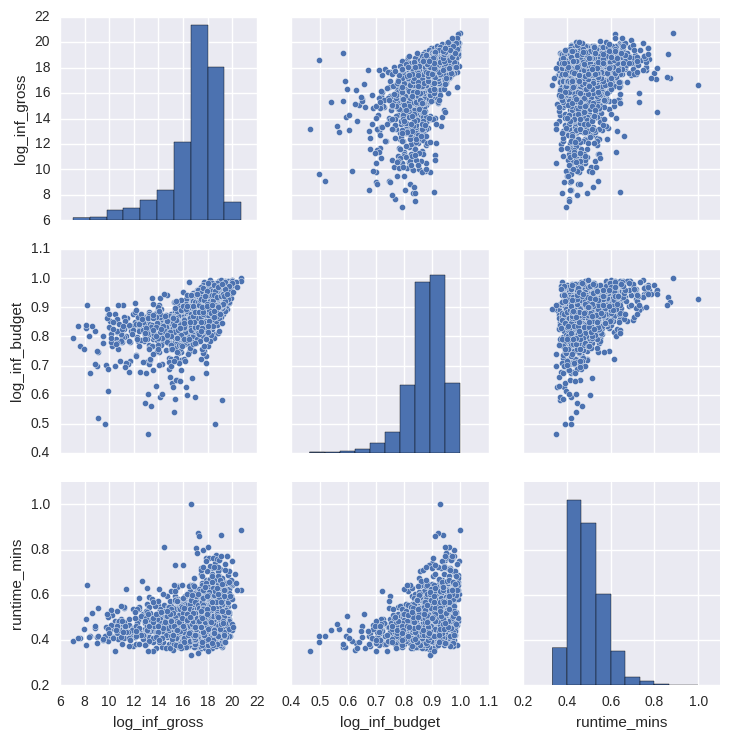

In [88]:
# pair plot
sns.pairplot(movies[['log_inf_gross', 'log_inf_budget', 'runtime_mins']])

In [89]:
# create train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create your model
model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_inf_gross   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     21.75
Date:                Tue, 31 Jan 2017   Prob (F-statistic):          1.22e-122
Time:                        16:21:15   Log-Likelihood:                -2349.2
No. Observations:                1263   AIC:                             4788.
Df Residuals:                    1218   BIC:                             5020.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
log_inf_budget    13.2954      0.936     14.198      0.000        11.458    15.133
runtime_mins       2.6825      0.772      3.476      0.001         1.168     4.197
G                  1.8430      0.412      4.473      0.000         1.035     2.651
PG                 1.3127      0.235      5.586      0.000         0.852     1.774
PG-13              1.1646      0.210      5.546      0.000         0.753     1.577
R                  0.5145      0.198      2.603      0.009         0.127     0.902
Unrated           -2.0049      0.421     -4.758      0.000        -2.832    -1.178
action             0.0487      0.137      0.355      0.723        -0.221     0.318
adventure          0.1348      0.149      0.906      0.365        -0.157     0.427
animation         -0.2129      0.340     -0.625      0.532        -0.881     0.455
biography         -0.4256      0.198     -2.152      0.032        -0.814    -0.038
comedy             0.2759      0.125      2.205      0.028         0.030     0.521
crime             -0.0999      0.136     -0.737      0.461        -0.366     0.166
documentary        1.6505      0.617      2.674      0.008         0.439     2.862
drama             -0.4434      0.123     -3.614      0.000        -0.684    -0.203
family             0.1722      0.262      0.657      0.511        -0.342     0.686
fantasy           -0.1315      0.156     -0.845      0.398        -0.437     0.174
history            0.1758      0.275      0.639      0.523        -0.364     0.715
horror             0.4511      0.175      2.575      0.010         0.107     0.795
music              0.1170      0.251      0.467      0.640        -0.375     0.609
musical           -0.1567      0.408     -0.384      0.701        -0.956     0.643
mystery            0.0755      0.151      0.500      0.617        -0.221     0.372
romance           -0.0459      0.117     -0.393      0.695        -0.275     0.183
sci_fi            -0.2834      0.154     -1.840      0.066        -0.585     0.019
sport              0.0634      0.237      0.267      0.789        -0.402     0.528
thriller          -0.0682      0.128     -0.535      0.593        -0.319     0.182
war               -0.4569      0.261     -1.752      0.080        -0.968     0.055
western           -0.9574      0.396     -2.415      0.016        -1.735    -0.180
April              0.1844      0.164      1.122      0.262        -0.138     0.507
August             0.0661      0.148      0.447      0.655        -0.224     0.356
December           0.4384      0.172      2.545      0.011         0.100     0.776
February           0.2742      0.163      1.680      0.093        -0.046     0.594
January            0.5942      0.152      3.919      0.000         0.297     0.892
July               0.5449      0.165      3.303      0.001         0.221     0.869
June        

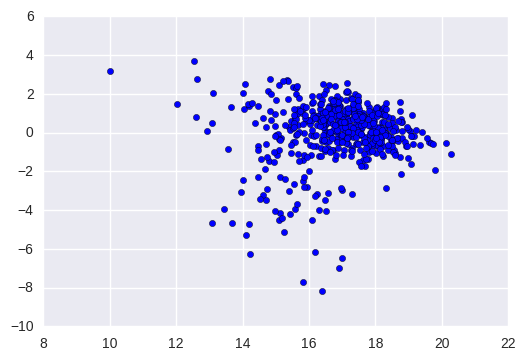

In [90]:
# plot residules
plt.scatter(fit.predict(X_test), y_test - fit.predict(X_test))

In [92]:
# use scikitlearn
#X_train = X_train.drop('Intercept', axis=1)
#X_test = X_test.drop('Intercept', axis=1)
lr = LinearRegression()
lr.fit(X_train, y_train)
print lr.score(X_train, y_train)
print lr.score(X_test, y_test)

0.440054877851
0.463983443502


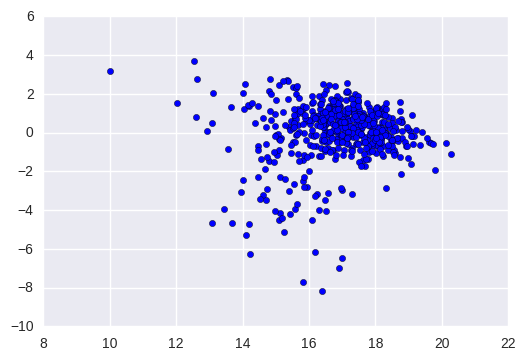

In [93]:
plt.scatter(lr.predict(X_test), y_test - lr.predict(X_test))

In [95]:
#z = zip(X_test.columns, lr.coef_)
#feat = sorted(z, key = lambda t: t[1], reverse=True)
#feat

In [97]:
movies1 = movies
#X = X.drop('Intercept', axis=1)
movies1['predict'] = lr.predict(X)
movies1['predict_diff'] = abs(movies.log_inf_gross - movies.predict)
movies1.sort_values(['predict_diff'], ascending=False ).head(20)

log_inf_gross       log_inf_budget         runtime_mins  \
899                  8.22                 0.91                 0.64   
1262                 8.13                 0.84                 0.49   
1337                 7.51                 0.84                 0.41   
265                  7.66                 0.77                 0.41   
1604                18.61                 0.50                 0.39   
182                  8.61                 0.84                 0.52   
679                  9.91                 0.87                 0.50   
831                  8.36                 0.80                 0.42   
33                   8.85                 0.82                 0.45   
530                 19.13                 0.58                 0.37   
375                 10.50                 0.88                 0.48   
171                  9.79                 0.89                 0.42   
1630                10.00                 0.88                 0.43   
1430                 7.97                 0.76                 0.45   
1261                10.34                 0.83                 0.42   
1013                10.03                 0.85                 0.42   
840                 10.07                 0.83                 0.42   
1264                18.14                 0.78                 0.39   
1273                 9.81                 0.86                 0.52   
1052                10.72                 0.91                 0.48   

                        G                   PG                PG-13  \
899                  0.00                 0.00                 0.00   
1262                 0.00                 0.00                 0.00   
1337                 0.00                 0.00                 0.00   
265                  0.00                 0.00                 0.00   
1604                 0.00                 0.00                 0.00   
182                  0.00                 0.00                 0.00   
679                  0.00                 0.00                 1.00   
831                  0.00                 0.00                 1.00   
33                   0.00                 0.00                 0.00   
530                  0.00                 0.00                 0.00   
375                  0.00                 0.00                 1.00   
171                  0.00                 0.00                 0.00   
1630                 0.00                 0.00                 0.00   
1430                 0.00                 0.00                 0.00   
1261                 0.00                 0.00                 1.00   
1013                 0.00                 0.00                 0.00   
840                  0.00                 0.00                 0.00   
1264                 0.00                 0.00                 0.00   
1273                 0.00                 0.00                 0.00   
1052                 0.00                 0.00                 0.00   

                        R              Unrated               action  \
899                  1.00                 0.00                 0.00   
1262                 1.00                 0.00                 0.00   
1337                 1.00                 0.00                 0.00   
265                  1.00                 0.00                 0.00   
1604                 1.00                 0.00                 0.00   
182                  1.00                 0.00                 1.00   
679                  0.00                 0.00                 0.00   
831                  0.00                 0.00                 0.00   
33                   1.00                 0.00                 1.00   
530                  1.00                 0.00                 0.00   
375                  0.00                 0.00                 0.00   
171                  1.00                 0.00                 0.00   
1630                 1.00                 0.00                 0.00   
1430                 1.00         

In [98]:
# movies which model is having trouble predicting
df[movies1.predict_diff > 6]

actors               budget  \
33      [James McAvoy, Mark Strong, Andrea Riseborough]         8,500,000.00   
171         [Nicolas Cage, Nicole Kidman, Cam Gigandet]        35,000,000.00   
182   [Jean-Claude Van Damme, Dolph Lundgren, Scott ...        11,500,000.00   
265              [Alice Eve, Josh Peck, Brian Geraghty]         3,000,000.00   
375    [Jesse Metcalfe, Amber Tamblyn, Michael Douglas]        25,000,000.00   
530   [Heather Donahue, Michael C. Williams, Joshua ...            60,000.00   
679    [Matthew McConaughey, Naomi Watts, Ken Watanabe]        25,000,000.00   
831     [Orlando Bloom, Riley Keough, Taraji P. Henson]         6,000,000.00   
840   [Hayden Christensen, Thandie Newton, John Legu...        10,000,000.00   
899            [Jared Leto, Sarah Polley, Diane Kruger]        47,000,000.00   
1013   [Martin Freeman, Gwyneth Paltrow, Penélope Cruz]        15,000,000.00   
1261  [Paris Hilton, Joel David Moore, Christine Lakin]         9,000,000.00   
1262       [Kate Beckinsale, Matt Dillon, Vera Farmiga]        11,500,000.00   
1264     [Jim Caviezel, Greg Kinnear, Bridget Moynahan]         3,700,000.00   
1337        [Samuel L. Jackson, Luke Kirby, Ruth Negga]        12,000,000.00   
1430       [Ashley Grace, James Franco, Heather Graham]         2,500,000.00   
1604   [Katie Featherston, Micah Sloat, Mark Fredrichs]            15,000.00   
1630         [Rebecca Hall, Bruce Willis, Vince Vaughn]        26,350,000.00   

                director                                       genre  \
33         [Eran Creevy]                     Action, Crime, Thriller   
171    [Joel Schumacher]                             Crime, Thriller   
182         [John Hyams]   Action, Horror, Mystery, Sci-Fi, Thriller   
265       [David Brooks]                            Horror, Thriller   
375        [Peter Hyams]             Crime, Drama, Mystery, Thriller   
530      [Daniel Myrick]                      Drama, Horror, Mystery   
679       [Gus Van Sant]                                       Drama   
831         [Lance Daly]                             Drama, Thriller   
840      [Brad Anderson]                   Horror, Mystery, Thriller   
899   [Jaco Van Dormael]             Drama, Fantasy, Romance, Sci-Fi   
1013      [Jake Paltrow]      Comedy, Drama, Fantasy, Music, Romance   
1261        [Tom Putnam]                             Comedy, Romance   
1262         [Rod Lurie]             Crime, Drama, Mystery, Thriller   
1264       [Simon Brand]             Crime, Drama, Mystery, Thriller   
1337      [David Weaver]                      Crime, Drama, Thriller   
1430   [Stephen Elliott]                                       Drama   
1604         [Oren Peli]                                      Horror   
1630    [Stephen Frears]                      Comedy, Drama, Romance   

           gross_domestic          imdb_rating           meta_score  \
33               6,787.00                61.00                49.00   
171             16,816.00                53.00                37.00   
182              5,247.00                50.00                58.00   
265              2,034.00                47.00                34.00   
375             32,409.00                59.00                35.00   
530        140,530,114.00                64.00                81.00   
679             20,083.00                58.00                23.00   
831              4,106.00                56.00                52.00   
840             22,197.00                49.00                50.00   
899              3,600.00                79.00                63.00   
1013            20,380.00                59.00                49.00   
1261            27,696.00                19.00                 7.00   
1262             3,045.00                72.00                64.00   
1264        63,677,735.00                65.00                44.00   
1337             1,744.00                56.00                37.00   
1430             2,760.

In [ ]:
#movies1a = movies1[movies.predict_diff < 4.5]

In [ ]:
'''movies1a = movies1a.drop(['predict', 'predict_diff'], axis=1)
y1 = movies1a['log_inf_gross']
X1 = movies1a[new_cols[1:]]

# create train and test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)

model1 = sm.OLS(y1_train, X1_train)
fit1 = model1.fit()
fit1.summary()'''

In [ ]:
'''# use scikitlearn
lr1 = LinearRegression()
lr1.fit(X1_train, y1_train)
print lr1.score(X1_train, y1_train)
print lr1.score(X1_test, y1_test)'''

In [ ]:
# plot residules
#plt.scatter(lr1.predict(X1_test), y1_test - lr1.predict(X1_test))

In [99]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LinearRegression(), X, y, scoring='r2', cv=5)
print scores
print scores.mean()

[ 0.36257694  0.41556454  0.4166846   0.38905591  0.21836171]
0.360448741129


In [100]:
from sklearn.linear_model import Lasso

/home/ali/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
/home/ali/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


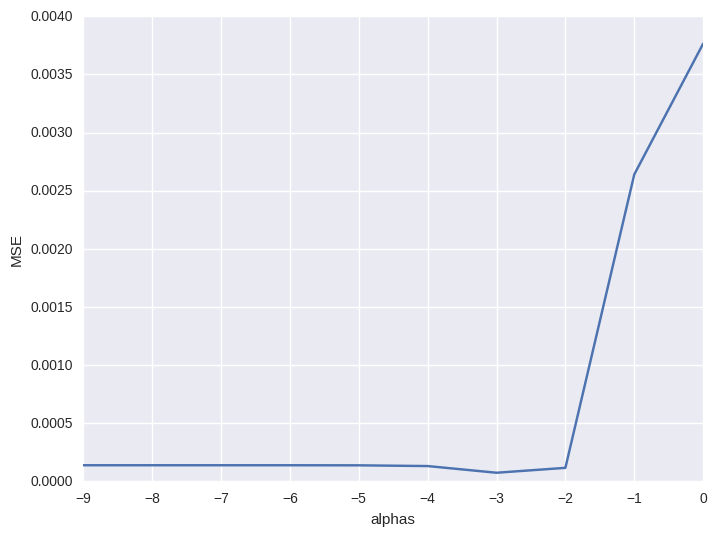

In [101]:
# Test, train, split option via Lasso
alphas=[1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]

def make_estimator(est, alpha):
    est.alpha = alpha
    model = est.fit(X_train,y_train)
    mse = np.mean(y_test - model.predict(X_test)) ** 2
    return mse
    
# Get scores
all_mse = []    
for a in alphas:    
    all_mse.append(make_estimator(Lasso(), a))
    

#plot of model
plt.figure(figsize=(8,6))
plt.legend()
plt.plot(np.log10(alphas),all_mse)
plt.legend()
plt.xlabel('alphas')
plt.ylabel('MSE')
plt.show()

In [102]:
all_mse

[0.00013842187990927148,
 0.00013842127387071775,
 0.00013841521355819012,
 0.00013835461772997073,
 0.00013771074117513234,
 0.00013139288114147346,
 7.386155488523557e-05,
 0.00011603200210318853,
 0.0026399556346065104,
 0.003765461507225227]

In [103]:
est=Lasso(alpha=alphas[7])
est.fit(X_train,y_train)
est.alpha

0.01

In [104]:
print est.score(X_train, y_train)
print est.score(X_test, y_test)

0.415930419904
0.452769318341


In [105]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(est, X, y, scoring='r2', cv=5)
print scores
print scores.mean()

[ 0.36210496  0.39528186  0.3838072   0.36452992  0.25091255]
0.351327298201


In [106]:
zipped=zip(X.columns,est.coef_)
features=sorted(zipped,key = lambda t: t[1],reverse=True)
features

[('log_inf_budget', 11.235671830381497),
 (u'runtime_mins', 0.98938349207145149),
 ('wri_1_4', 0.35091462815992019),
 ('dir_1_4', 0.28643393349016866),
 ('act_5_more', 0.24014797635596574),
 (u'family', 0.2139024585960313),
 ('July', 0.19794989829781393),
 ('December', 0.18942711335228865),
 ('January', 0.18071015853259273),
 (u'comedy', 0.15674662333659259),
 (u'adventure', 0.14566526740059971),
 (u'horror', 0.13827262008805533),
 ('November', 0.0060563734356023418),
 (u'G', 0.0),
 (u'PG', 0.0),
 (u'PG-13', 0.0),
 (u'action', 0.0),
 (u'animation', 0.0),
 (u'documentary', 0.0),
 (u'fantasy', 0.0),
 (u'history', 0.0),
 (u'music', 0.0),
 (u'musical', -0.0),
 (u'mystery', 0.0),
 (u'romance', -0.0),
 (u'sport', 0.0),
 (u'thriller', -0.0),
 (u'war', -0.0),
 ('April', -0.0),
 ('February', 0.0),
 ('June', 0.0),
 ('March', -0.0),
 ('act_1_4', 0.0),
 ('dir_5_more', 0.0),
 ('wri_5_more', -0.0),
 ('wri_0', -0.0),
 ('September', -0.0043200088416426403),
 ('dir_0', -0.031168685056415596),
 ('August

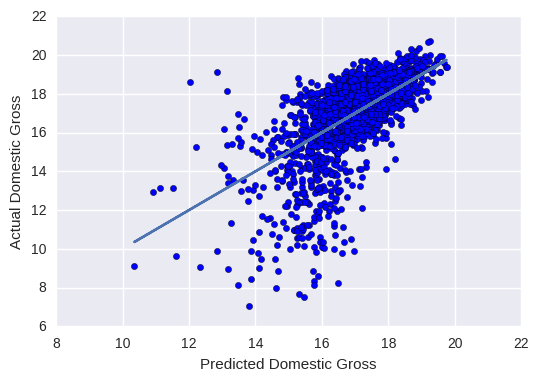

In [107]:
plt.scatter(est.predict(X), y)
plt.plot(est.predict(X), est.predict(X))
plt.xlabel("Predicted Domestic Gross")
plt.ylabel("Actual Domestic Gross")

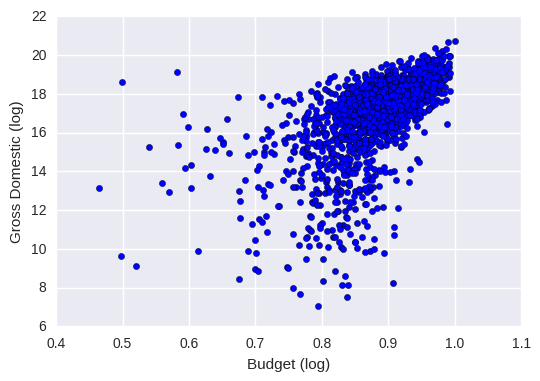

In [108]:
plt.scatter(X.log_inf_budget, y)
plt.xlabel("Budget (log)")
plt.ylabel("Gross Domestic (log)")

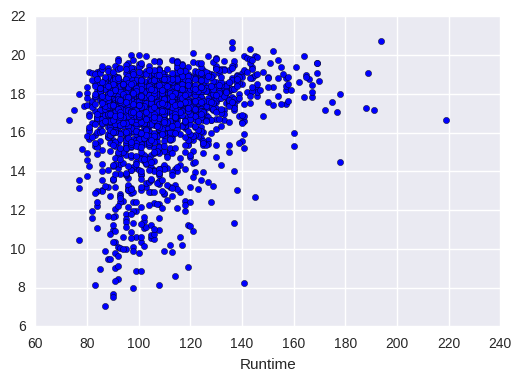

In [109]:
plt.scatter(df.runtime_mins, y)
plt.xlabel("Runtime")

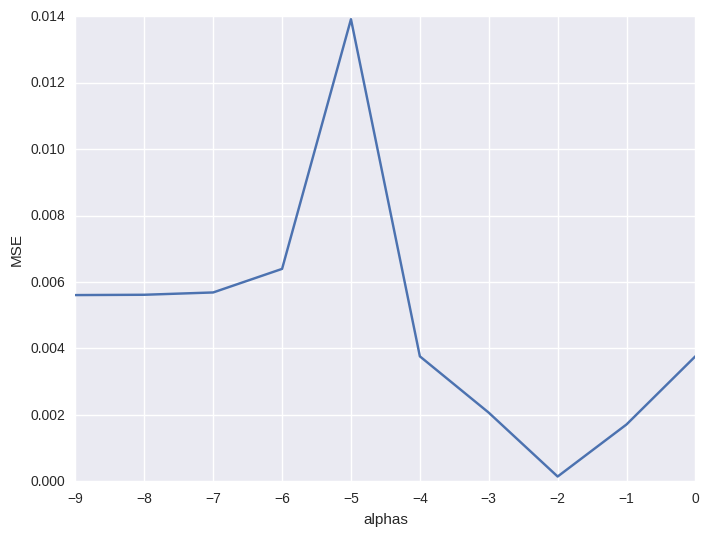

In [110]:
poly = PolynomialFeatures(2)
X_t_train = poly.fit_transform(X_train)
X_t_test = poly.fit_transform(X_test)

# Test, train, split option via Lasso
alphas=[1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]

def make_estimator(est,alpha):
    est.alpha=alpha
    model = est.fit(X_t_train,y_train)
    mse=np.mean(y_test-model.predict(X_t_test))**2
    return mse
    
# Get scores
all_mse=[]    
for a in alphas:    
    all_mse.append(make_estimator(Lasso(),a))
    

#plot of model
plt.figure(figsize=(8,6))
plt.legend()
plt.plot(np.log10(alphas),all_mse)
plt.legend()
plt.xlabel('alphas')
plt.ylabel('MSE')
plt.show()

In [111]:
all_mse

[0.005607630019753258,
 0.005617125471233467,
 0.005686828262462344,
 0.006396347873638834,
 0.013913630813510986,
 0.0037633863473042293,
 0.0020677310599395917,
 0.00014437209299023187,
 0.001712675087106475,
 0.003765461507225227]

In [112]:
model = Lasso(alpha=alphas[7])

In [113]:
model.fit(X_t_train, y_train)
print model.score(X_t_train, y_train)
print model.score(X_t_test, y_test)

0.457150148054
0.476026090537


In [115]:
#zipped=zip(X.columns,model.coef_)
#features=sorted(zipped,key = lambda t: t[1],reverse=True)
#features